**Day 6**: Model tuning 🎵 (***live in 1.51***)

<center><h1 style="color:maroon">Model Tuning</h1>
    <img src="https://drive.google.com/uc?id=14b9bU6GQOrICefbcQXWTpkNOaklHaVpy" style="width:1300px;">
    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2023)</span></i></h6></center>

## Plan for today's Lecture 🗓 

* Suport Vector Machine
* Multi-layer perceptron (neural network)
* Model Tuning

## Intended learning outcomes 👩‍🎓

* Choose a fit for purpose model
* Know how to optimize your parameters
* Use SVR and SVC for respectively regression and classification
* Use basic fully-connected neural network

# Data used today
We are back to the <a href="https://www.kaggle.com/aungpyaeap/fish-market">Kaggle fish market dataset</a>.
<img src="https://drive.google.com/uc?id=15C8CpZBVfyZtK-Lg4_3RLJWkripvkMwW" style="width:1300px;">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Some packages we will use later to plot...
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline

df = pd.read_csv('Lecture_data/fish_no_pikes.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
# Setting up classification propblems
Xc = df.drop(columns=['Species'])
yc = df.Species.copy()

Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc,yc, train_size=.7, random_state=42)

# Setting up regression problems
Xr = df.drop(columns=['Species', 'Weight'])
yr = df.Weight.copy()

Xr_train, Xr_val, yr_train, yr_val = train_test_split(Xr,yr, train_size=.7, random_state=42)

In [3]:
# Setting our preprocessor and encoding y_cat for categorical problems

preprocessor = make_pipeline(SimpleImputer(), StandardScaler())

encoder = LabelEncoder().fit(yc_train)
yc_train = encoder.transform(yc_train)
yc_val = encoder.transform(yc_val)

# (Non-)Parametric Algorithm of the Day: Support Vector Machines
<br>

<center><img src="https://drive.google.com/uc?id=15A7GFl3Jk5z8frH-Q7XXWS1h8Zvapxtl" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Two Doric columns supporting a temple in a soft green light, digital art.</center>

### What is the optimal decision boundary for this classification?
<img src="https://drive.google.com/uc?id=15UW8HhfbxYEww0p7c7et-9jojdt1Y9bN" style="width:1200px">
<a href="https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c">Ippoloto, 2019</a>
<p>Infinite number of potential decision boundaries that separate the classes ("hyperplanes")</p>


<img src="https://drive.google.com/uc?id=15Ii1Zr9br6ow2cVd_B75TFXzxCXlpQQD" style="width:1200px;"><br>
<a href="https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c">Ippoloto, 2019</a>

* The hyperplane that generalizes best to unseen data is the one that is furthest from all the points (maximizes the **margin**)
* The points on the margin boundary are called **support vectors**
* Finding them is a convex optimization problem (one single best solution)
* **Maximum Margin Classifier** algorithm


* Max Margin is super sensitive to outliers
* It **overfits** to the training data

For **generalization** purpose, we may want to allow some points to be **inside** the margin, or even **on the other side** of the decision boundary:<br>
<img src="https://drive.google.com/uc?id=14ekY95fAY-sKnZP4wDEsyt8q1UQbGtDt" style="width:900px;">
<a href="https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe">Mishra, 2019</a>

### Soft margin classifier
Allows a few points to be misclassified but with a **penalty ($\xi$)** for how "far" they lie on the wrong side of the margin


The **Hinge Loss** is the penalty applied to each point on the wrong side<br>
* The deeper a point lies within the margin, the higher the loss
* The penalty is linear, like MAE <br>
<img src="https://drive.google.com/uc?id=14ekY95fAY-sKnZP4wDEsyt8q1UQbGtDt" style="width:800px;">
<a href="https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe">Mishra, 2019</a>

<img src="https://drive.google.com/uc?id=15NsX8wGJIf9tar9i2p46SUN5RzCGTSs0" style="width:1300px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

## Hinge Loss (Linear SVM - parametric)

$$\text{Hinge Loss} = (\max(0, 1 - y_i \cdot (w \cdot x_i + b)))$$

Where:

- $( y_i )$ represents the actual label of the ith data point, which is usually +1 or -1 in binary classification problems.
- $( w )$ denotes the weight vector.
- $( x_i )$ is the ith data point (a feature vector).
- $( b )$ is the bias term.

The hinge loss function penalizes misclassifications and also those correct classifications that are not confident enough (i.e., those that are close to the decision boundary). The objective of the SVM is to find the values of `w` and `b` that minimize this loss across all data points while also keeping the norm of `w` as small as possible, which helps in maximizing the margin between the classes.

### Regulariation hyperparameter <code>C</code>
Stength of the penalty applied on points being on the wrong side of the margin
* The higher <code>C</code>, the stricter the margin
* A "maximum margin classifier" has <code>C</code> = $+ \infty$
* The smaller <code>C</code>, the softer the margin, the more it is ***regularized***
* C similar to $1/ \alpha$ in Ridge 
<img src="https://drive.google.com/uc?id=14nSHRMLiBlKmg4SJKGvDxNCMXA3OlhFU" style="width:1200px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>


<p>💻 sklearn implementation</p>


In [4]:
from sklearn.svm import SVC
svc = make_pipeline(preprocessor, SVC(kernel='linear', C=10)) # Parametric model

In [5]:
svc.fit(Xc_train, yc_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('svc', SVC(C=10, kernel='linear'))])

In [6]:
accuracy_score(yc_val, svc.predict(Xc_val))

0.9069767441860465

In [7]:
# equivalent but better optimization (parametric)
from sklearn.svm import LinearSVC
svc_linear = make_pipeline(preprocessor, LinearSVC(C=10, dual=True, max_iter=5000))
svc_linear.fit(Xc_train, yc_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('linearsvc', LinearSVC(C=10, dual=True, max_iter=5000))])

In [8]:
# equivalent but with SGD solver (also parametric)
from sklearn.linear_model import SGDClassifier
svc_bis = make_pipeline(preprocessor, SGDClassifier(loss='hinge', penalty='l2', alpha=1/10))

## SVM-Regressors 

Reverse the objective:
* **Classification**: fit the largest possible *street* **between** two classes
* **Regression**: fit as many points as possible **within** the *street*
* Width of the street controlled by an additional hyperparam $\epsilon$
<img src="https://drive.google.com/uc?id=14n0-iOcR47_1rChRr09kBi8zvjN6_Zgh" style="width:1200px">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

In [9]:
from sklearn.svm import SVR
svr = make_pipeline(preprocessor, SVR(epsilon=.1, kernel='rbf', C=1000))

In [10]:
svr.fit(Xr_train, yr_train)
np.sqrt(mean_squared_error(yr_val, svr.predict(Xr_val)))

50.742460018888

⚠️ Warning: All support vector models requires **scaling**
<img src="https://drive.google.com/uc?id=15UH1IariB6tQVcmyzLt43h8wPnumj2bZ" style="width:1800px;">
<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

# SVM 'kernels'

<img src="https://drive.google.com/uc?id=15Y316SyzWWt9ms2aC0ILzVMXzNmv_CDK" style="width:1200px">

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

## We can create more features to separate this data:

<img src="https://drive.google.com/uc?id=15DY_na_wFvO0COGDI-zN6blQYDyBcg7x" style="width:1300px">

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Geron, 2017</a>

☝️ Creates new features - curse of dimensionality!

🌽 Instead, we can use a mathematical <strong style="color:teal">'kernel'</strong> to simulate new features

# The kernel-trick

📏 Measure a distance pair-wise between each sample to transform the feature-space and use this to simulate new features

* ***Linear kernel function*** for linear datasets (the best for high-dimensional datasets - speed! Considered only ***parametric*** SVM in sklearn as done in the same feature space)<br>$F(x, xj) = sum( x.xj)$

* ***Polynomial kernel functions*** (example of previous slide with $X^3$)<br> $F(x, xj) = (x.xj+1)^d$

* ***Gaussian Radial Basis function kernel (RBF)*** (one of the favourite kernels for non-linear datasets)<br> $F(x, xj) = \exp(-\gamma * ||x - xj||^2)$

* ***Sigmoid kernel function*** <br> $F(x, xj) = tanh(αxay + c)$<br><br><a href="https://dataaspirant.com/svm-kernels/">Good reference on SVMs with kernels</a>

The hinge loss for a kernelized SVM is given by:

$$\text{Hinge Loss} = \sum_{i=1}^{N} \max(0, 1 - y_i(F(x_i)))$$

Where:

- $F(x_i)$ is the decision function (see above)
- $\alpha_j$ are the dual coefficients.
- $y_j$ are the labels of the support vectors.
- $K(x_j, x_i)$ is the kernel function applied between a support vector $x_j$ and the input vector $x_i$.
- $b$ is the bias term.
- $N$ is the total number of training examples.
- $M$ is the number of support vectors.

The sum is taken over all $N$ training examples, and the decision function is computed using the support vectors, their labels, and the kernel function.
This expression encapsulates the hinge loss in the context of a kernelized SVM. The loss is calculated 

# Parametric Algorithm of the Day: Neural Networks
<br>

<center><img src="https://drive.google.com/uc?id=15PB5vlQbDpDZ0rOqeIQkCnCEMS3evUts" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Algorithm of the day.</center>

# Neural Networks

## Biological Neurons

<img src="https://drive.google.com/uc?id=14psocOpGRtt3epKPLpuPxw1MzMNwhlHY" style="width:1000px">
<a href="https://www.youtube.com/watch?v=_HMLZHQpQDI">Krigolson, 2019</a> (YouTube video)

* 🔣 Biological neurons take inputs through their dendrite, transform the input, yield an output

* 🔥 The neuron <span style="color:brown">**only fires if a threshold in signal is reached**</span> (non-linear)

* 🤖 Artificial neurons are <span style="color:blue">*loosely*</span> inspired from the biological neuron

## Artificial Neurons

The combination of the linear regression followed by an activation function is effectively what is known as an **ARTIFICIAL NEURON**!

<img src="https://drive.google.com/uc?id=15QdD-8cXoqeIL18ChQeXGjilUkMP1vW9" style="width:800px">
<a href="https://www.amazon.com/dp/0131471392">Haykin, 2008</a>




* Notice the <span style="color:blue">**Activation Function**</span>

### Let's write one from scratch in Python!

Neural networks are surprisingly easy to code. Let's imagine that we have feature vector (`X`, shape=4) that pertain to weather, and a label (`y`) that indicates whether it will rain (`1`) or not (`0`) in the next hour. Here is how a sample would look:


In [11]:
import numpy as np

# Example of a 'rainy day':

y = 1
X = [1., -3.1, -7.2, 2.1]

☔ We want to **predict whether or not it will rain**!


We can write a function that returns a linear regression wiht some weights:


In [12]:
def linreg_1(X):
    return -3 + 2.1*X[0] - 1.2*X[1] + 0.3*X[2] + 1.3*X[3]

out_1 = linreg_1(X)
out_1

3.39

## Activation function

* 📏 As writen above, our <span style="color:red">algorithm is simply a linear regression</span>.

 
* ❄️ The trick is to take the output of the linear function, and <span style="color:blue">transform it via an activation function</code>. 

* 🚧 The activation function will <span style="color:teal">only output the value if certain conditions are met</span>

**Some well-known activation functions:**
<img src="https://drive.google.com/uc?id=14YT7Hla4C4NchT7EVnGraEjRI_jnH9cO" style="width:1000px">
                                                   
<a href="https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092"> Jadon, 2018</a>

<span style="color:brown">(**ReLU** most commonly used these days)</span>

### Implementing the 'ReLU' function

In [13]:
def activation(x):
    if x > 0:
        return x
    else:
        return 0

out_1 = activation(out_1)
out_1

3.39

### Adding more neurons with the same inputs but different weights

We can
* apply **other** linear regressions (neurons) to the same input X
* followed by the **same** activation function
* but with different **(trainable) weights and biases**

In [14]:
def linreg_2(X):
    return -5 - 0.1*X[0] + 1.2*X[1] + 4.9*X[2] - 3.1*X[3]

out_2 = activation(linreg_2(X))

and:


In [15]:
def linreg_3(X):
    return -8 + 0.4*X[0] + 2.6*X[1] +- 2.5*X[2] + 3.8*X[3]

out_3 = activation(linreg_3(X))

### We just wrote a layer of neurons!
Each neuron receives the same input (`X`), has different weights, and uses the same activation function.

In neural networks, the next step is to give the output of these neurons as input to the next layer of neurons


## Building a Neural Network

A neural network is a complex function $f_{\theta}$:
$$f_{\theta}(X) = \hat{y}$$

Where <span style="color:blue">$X$</span> is the feature vectors, <span style="color:purple">$\theta$</span> are the weights and biases of the linear regressions that take place within each neuron, and <span style="color:brown">$\hat{y}$</span> is the prediction output of the function.

<img src="https://drive.google.com/uc?id=15M4QdS2e81iBmKsy3h5TvUwHmpup-Hzs" style="width:1000px">
<a href="http://www.astroml.org/_images/fig_neural_network_1.png">Ž. Ivezić et al., 2014</a>

The way the neurons and the weight and biases are connected is known as the **architecture** of your neural network. 


### Implementing the next layer (output)

In [16]:

def linreg_next_layer(X):
    return 5.1 + 1.1*X[0] - 4.1*X[1] - 0.7*X[2]

def activation_next_layer(x):
    # this is known as the sigmoid activation, used for clasification task!
    return 1. / (1 + np.exp(-x))

def neural_net_predictor(X):

    out_1 = activation(linreg_1(X))
    out_2 = activation(linreg_2(X))
    out_3 = activation(linreg_3(X))

    outs = [out_1, out_2, out_3]
    
    y_pred = activation_next_layer(linreg_next_layer(outs))
    
    return y_pred


In [17]:

# Final prediction
y_pred = neural_net_predictor(X)

print(f' Probability of rain: {y_pred:.02f}')



 Probability of rain: 0.83


### 🎉 Congrats! You just build your first (artificial) neural network

* and because it is in pure `Python`, it is **super inefficent**!
* Also, the weights and biases in our function are fixed (not trainable)

## Deep-Learning with <code>scikit-learn</code>

Although there is a module called <code>neural_network</code> in <code>scikit-learn</code>, it contains only three algorithms (<code>BernoulliRBM()</code>,<code>MLPClassifier()</code>, and <code>MLPRegressor()</code> and, in practice, it is very limited:

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_class = MLPClassifier(hidden_layer_sizes=(30, 30, 10), activation='relu', max_iter=5000)
mlp = make_pipeline(preprocessor, mlp_class)

x = [[1.2,0.1], [2.3,0.4], [1.3,0.2], [1.5,0.2], [4.6,0.12], [2.3,0.23]]
y = [0,1,1,1,0,1]

mlp.fit(Xc_train, yc_train)
print(accuracy_score(yc_val, mlp.predict(Xc_val)))

mlp.fit(x, y)
print(accuracy_score(y, mlp.predict(x)))

0.8604651162790697
1.0


🚨 This works, but we are not able to devise our own architecture beyond deciding how many layers and number of neuron per layers.

💡 For this, we need a framework specific for Deep-Learning: the two most popular today are <code>TensorFlow.keras</code> written and supported by **Google**, and <code>PyTorch</code> written and supported by **Meta**. But this is the topic of the next module...

# Model Tuning: Finding the best Hyperparameters
<br>

<center><img src="https://drive.google.com/uc?id=1582C1iMgMXhGYkmIjzmdOb1JqxMXjhTL" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A jazz band playing a happy tune on their saxophone in the lively streets of New Orleans, vivid colors.</center>

# How to select the right model?

### Model complexity vs dataset size (rule of thumb 👍)

* More than 100,000 datapoints: Parametric models (SGD, Neural Nets)
* Less than 100,000 datapoints: Non-parametric models (KNN, SVM, Decision Trees)


<img src="https://drive.google.com/uc?id=14lT6Ji1P3H8SjjNWu0rWyKnQ77XzusZL" style="width:1500px;">
<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html"><code>sklearn</code> algorithm cheat sheet</a>


### The grid search method
Explores different hyperparam value combinations to find those optimizing performance
<img src="https://drive.google.com/uc?id=15W2h4nY0n-PYVK66ub38GDPZ7wprbH8I" style="width:600px;">
<a href="https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35">Stalfort, 2019</a>

* Also applied using a *validation set* (never use test set for model tuning!)
* Select which grid of values of hyper-parameters to try out
* For each combinations of values, measure your performance on the *validation set*
* Select hyperparams that produce the best performance

**🔥 Grid Search CV**<br>
<img src="https://drive.google.com/uc?id=15Z-e0IwNR10Dg2dF12Abpsjq0kIIbTBu" style="width:1200px;"><br>
<a href="https://stats.stackexchange.com/questions/424477/how-to-make-train-test-split-with-given-class-weights">StackExchange, 2019</a>

### Sklearn  <code>GridSearchCV</code> 🚀

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = df.drop(columns=['Species', 'Weight'])
y = df[['Weight']]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Instanciate model
model = Ridge()

# Hyperparameter Grid
grid = {'alpha': [0.01, 0.1, 1], 
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(X_train, y_train);

In [21]:
# Best score
search.best_score_

0.8668931429340473

In [22]:
# Best Params
search.best_params_

{'alpha': 1, 'solver': 'sparse_cg'}

In [23]:
# Best estimator
search.best_estimator_

Ridge(alpha=1, solver='sparse_cg')

# GridSearch can be done with pipelines too!

In [24]:
svr.named_steps

{'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'svr': SVR(C=1000)}

In [44]:
svr.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('simpleimputer', SimpleImputer()),
                   ('standardscaler', StandardScaler())])),
  ('svr', SVR(C=1000))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'svr': SVR(C=1000),
 'pipeline__memory': None,
 'pipeline__steps': [('simpleimputer', SimpleImputer()),
  ('standardscaler', StandardScaler())],
 'pipeline__verbose': False,
 'pipeline__simpleimputer': SimpleImputer(),
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__simpleimputer__add_indicator': False,
 'pipeline__simpleimputer__copy': True,
 'pipeline__simpleimputer__fill_value': None,
 'pipeline__simpleimputer__keep_empty_features': False,
 'pipeline__simpleimputer__missing_values': nan,
 'pipeline__simpleimputer__strategy': 'mean',
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,
 'pipeline__standardscaler__with_std'

In [25]:
# Hyperparameter Grid
grid = {'svr': [SVR(), Ridge()],
        'pipeline__simpleimputer': [SimpleImputer(), MinMaxScaler()]}

# Instanciate Grid Search
search = GridSearchCV(svr, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(Xr_train,yr_train);

In [26]:
search.best_params_

{'pipeline__simpleimputer': MinMaxScaler(), 'svr': Ridge()}

In [27]:
search.best_score_

0.8768392858432618


<p>👎 Limitations of Grid Search:</p>
<ul>
<li>Computationally costly</li>
<li>The optimal hyperparameter value can be missed</li>
<li>Can overfit hyperparameters to the training set if too many combinations are tried out for too small a dataset</li>
</ul>


## Random Search

Randomly explore hyperparameter values from:
* A hyperparameter space to randomly sample from
* The specified number of samples to be tested<br>
<img src="https://drive.google.com/uc?id=156Oe5p4yOCYEfYujZgqvTSlJqxo-5nvR" style="width:1200px;">
<a href="https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35">Stalfort, 2019</a>


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instanciate model
model = Ridge()

# Hyperparameter Grid
grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg'], 'alpha': stats.loguniform(0.01,1)}

# Instanciate Grid Search
search = RandomizedSearchCV(model, grid, 
                            scoring='r2',
                            n_iter=100,  # number of draws
                            cv=5, n_jobs=-1)

# Fit data to Grid Search
search.fit(X_train, y_train)
search.best_estimator_

Ridge(alpha=0.919937809983199, solver='lsqr')

### Using a probability distribution in RandomSearch
Can be generated with <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats.distributions</a>


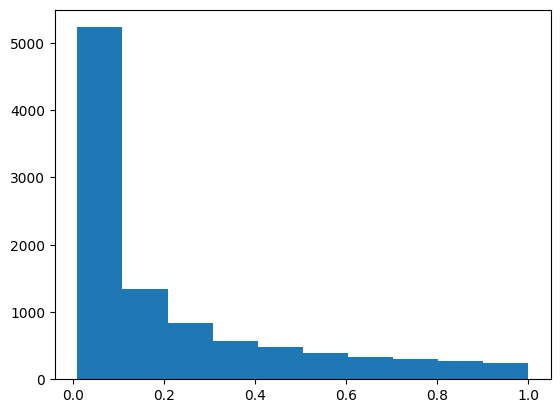

In [29]:
from scipy import stats
import matplotlib.pyplot as plt

dist = stats.norm(10, 2) # if you have a best guess (say: 10)

dist = stats.randint(1,100) # if you have no idea
dist = stats.uniform(1, 100) # same

dist = stats.loguniform(0.01, 1) # Coarse grain search

r = dist.rvs(size=10000) # Random draws
plt.hist(r);

<strong><span style="color:blue">Pipelines can be tuned with randomized search too!</span></strong>

### Limitations of GridSearch and RandomizedSearch:

* Both algorithms are not tracking the history of optimization 📜

* Choice of next set of parameter is random 🎲 

* Evaluation of the loss function is costly 💸

# Suggested Resources

## 📺 Videos 
#### Short videos from my Undegraduate Machine Learning Classes:
* 📼 <a href="https://youtu.be/8mNPHGmXS5Q?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Support Vector Machines</a>
* 📼 <a href="https://youtu.be/-ohZINc7OCY?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Introduction to Neural Networks</a>
* 📼 <a href="https://youtu.be/A1-HocOPXms?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Convolutional Neural Networks</a>
* 📼 <a href="https://youtu.be/aircAruvnKk">But what is a neural network? | Chapter 1, Deep learning</a>, by 3Blue1Brown
* 📼 <a href="https://youtu.be/04L4ZHiJbjs">TensorFlow & Keras Tutorial 2022 | Deep Learning With TensorFlow & Keras</a>, by Simplilearn (> 7 hours of video, full course!)

## 📚 Further Reading 
* 📖 <a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47">Support Vector Machine — Introduction to Machine Learning Algorithms</a> by Rohith Gandhi, 2018
* 📖 <a href="https://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf">Taking the Human Out of the Loop: A Review of Bayesian Optimization</a> by Shariari et al
* 📖 <a href="https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f">A Conceptual Explanation of Bayesian Hyperparameter Optimization for Machine Learning</a> by Will Koehrsen

## 💻🐍 Time to Code ! 